In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetic_df = pd.read_csv('/content/df_for_model.csv',index_col=0)
diabetic_df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_source_id_Other,admission_source_id_Referral,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Muscoloskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory
0,0,5,1,41,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,0,15,3,59,0,18,0,0,0,9,...,0,0,0,0,0,0,0,0,1,0
2,0,25,2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,0,1,0
3,1,35,2,44,1,16,0,0,0,7,...,0,0,0,0,0,0,0,0,1,0
4,1,45,1,51,0,8,0,0,0,5,...,0,0,0,0,0,0,0,1,0,0


# Modeling
* Logistic Regression
* Support Vector Machine (SVM)
* KNN
* Decision Tree
* Random Forest
* Naïve Bayes
* XGBoost

In [4]:
# To define X and y
X = diabetic_df.drop('readmitted_in_30_days',axis=1)
y = diabetic_df.readmitted_in_30_days

In [5]:
# To split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The data is extremely imbalanced since the readmission rate is less that 9% so I will perform the following resampling techniques to balance the data and see which one performs better

In [6]:
# Resample using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

In [7]:
# Resample using downsampling
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis=1)
not_readmitted = X[X.readmitted_in_30_days==0]
readmitted = X[X.readmitted_in_30_days==1]


In [8]:
not_readmitted_downsampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted), 
                                random_state = 1) 
downsampled = pd.concat([not_readmitted_downsampled, readmitted])
y_train_down = downsampled.readmitted_in_30_days
X_train_down = downsampled.drop('readmitted_in_30_days', axis=1)

In [ ]:
# Resample using upsampling
readmitted_upsampled = resample(readmitted,
                          replace=True, 
                          n_samples=len(not_readmitted), 
                          random_state=1) 
upsampled = pd.concat([not_readmitted, readmitted_upsampled])
upsampled.readmitted_in_30_days.value_counts()

X_train_up = upsampled.drop('readmitted_in_30_days',axis=1)
y_train_up = upsampled.readmitted_in_30_days

In [ ]:
# Use logistic regression to test 

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=5000,C=100,solver='liblinear') 
#SMOTE
logistic_regression_model.fit(X_train_sm, y_train_sm)
y_pred_log = logistic_regression_model.predict(X_test)
y_test_proba = logistic_regression_model.predict_proba(X_test)[:,1]
print('SMOTE')
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_log)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_log)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_log)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_log)))


SMOTE
Roc-Auc : 0.54
Accuracy : 0.82
Recall score : 0.16
Precision score: 0.12
F1 score : 0.14


In [9]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=5000,C=100,solver='liblinear') 
logistic_regression_model.fit(X_train_down, y_train_down)
y_pred_log = logistic_regression_model.predict(X_test)
y_test_proba = logistic_regression_model.predict_proba(X_test)[:,1]
print('Downsampling')
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_log)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_log)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_log)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_log)))

Downsampling
Roc-Auc : 0.64
Accuracy : 0.67
Recall score : 0.52
Precision score: 0.14
F1 score : 0.22


In [ ]:
logistic_regression_model.fit(X_train_up, y_train_up)
y_pred_log = logistic_regression_model.predict(X_test)
y_test_proba = logistic_regression_model.predict_proba(X_test)[:,1]
print('Upsampling')
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_log)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_log)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_log)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_log)))

Upsampling
Roc-Auc : 0.65
Accuracy : 0.69
Recall score : 0.51
Precision score: 0.14
F1 score : 0.22


Compare to SMOTE, upsampling and downsampling perform better. I decided to use downsampling

In [10]:
y_train_down.value_counts()

0    4806
1    4806
Name: readmitted_in_30_days, dtype: int64

In [11]:
X_train = X_train_down
y_train = y_train_down

In [12]:
# Scale data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

Now we have a balanced data for modeling. The next step is to use Grid Search to find the optimal hyperparameter and fit the model

Logistic Regression

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression() 
param_grid = dict(C=[0.01, 0.1, 1, 10, 100], solver=['lbfgs','liblinear'])
grid = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring = 'recall')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5249707403713647
{'C': 0.01, 'solver': 'lbfgs'}
LogisticRegression(C=0.01)


In [13]:
#Refit the model with optimal hyperparameter
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(C=1,solver='lbfgs') 
logistic_regression_model.fit(X_train, y_train)
y_pred_log = logistic_regression_model.predict(X_test)
y_test_proba = logistic_regression_model.predict_proba(X_test)[:,1]
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_log)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_log)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_log)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_log,average='macro')))



Roc-Auc : 0.64
Accuracy : 0.67
Recall score : 0.52
Precision score: 0.14
F1 score : 0.51


I used Macro f1 score to evaluate the model since I have highly imbalanced dataset and Macro calculates F1 score for each class then averages them



In [14]:
# Plot out highest coef and lowest coef
coef = pd.DataFrame({"coefficients": logistic_regression_model.coef_[0]},index=X_train_down.columns).sort_values("coefficients", ascending=True)


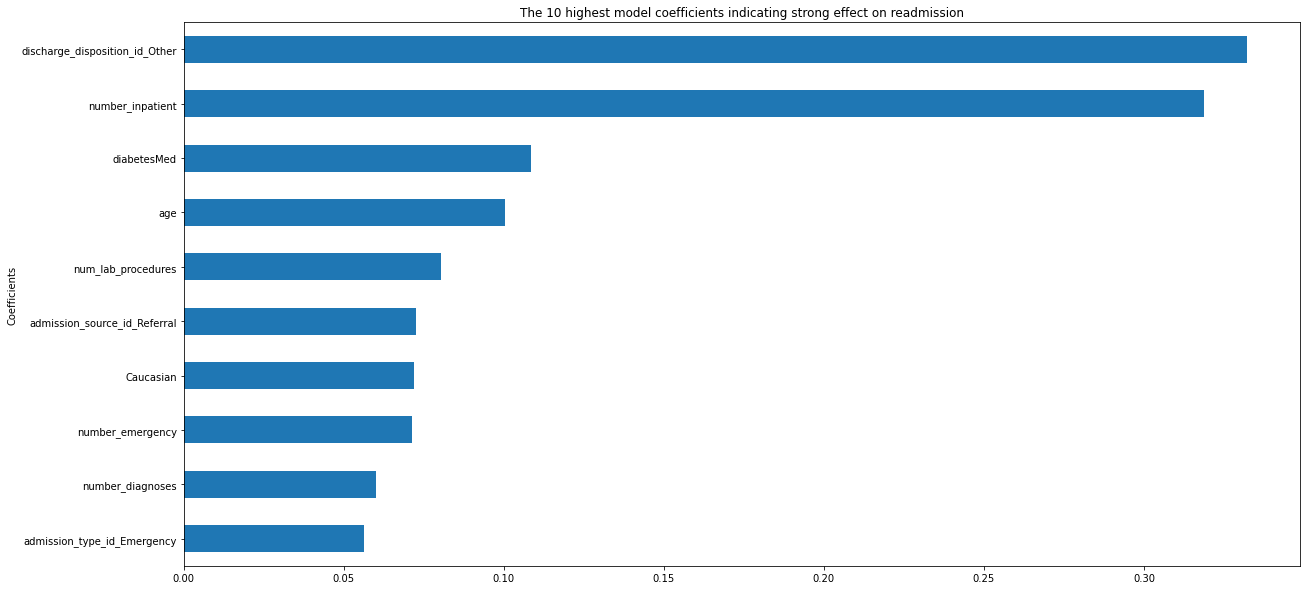

In [15]:
coef.tail(10).plot(kind="barh",align="center", figsize=(20, 10), legend=False)
plt.title("The 10 highest model coefficients indicating strong effect on readmission")
plt.ylabel("Coefficients")
plt.xticks()
plt.show()


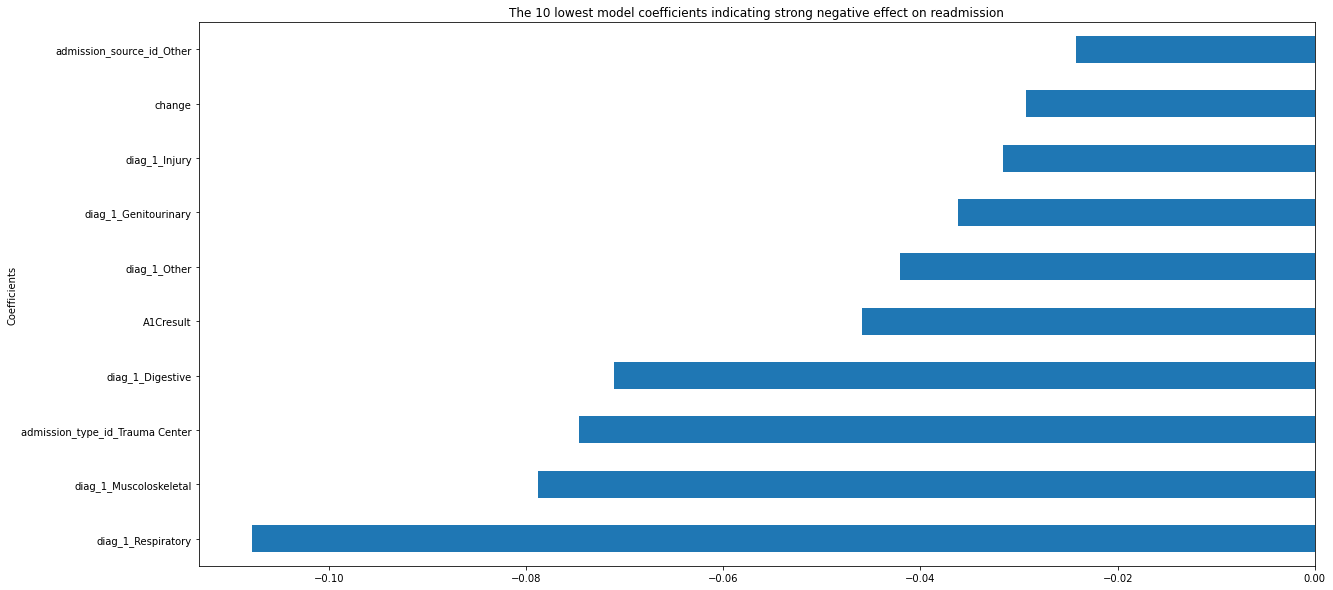

In [17]:
coef.head(10).plot(kind="barh",align="center", figsize=(20, 10), legend=False)
plt.title("The 10 lowest model coefficients indicating strong negative effect on readmission")
plt.ylabel("Coefficients")
plt.xticks()
plt.show()

admission_source_id_referral is related to PCP referral, hospital clinic referral and HMO referral

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=list(range(1,11)))
grid = GridSearchCV(knn, param_grid, cv=5, scoring = 'recall')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.5372481021804643
{'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9)


In [18]:
#Refit the model with optimal hyperparameter
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_test_proba_knn = knn.predict_proba(X_test)[:,1]
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba_knn)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_knn)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_knn)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_knn,average='macro')))

Roc-Auc : 0.57
Accuracy : 0.58
Recall score : 0.51
Precision score: 0.11
F1 score : 0.45


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy")
param_grid = dict(max_depth=list(range(1,60,2)),min_samples_split=list(range(2,10,2)))
grid = GridSearchCV(dtree, param_grid, cv=5, scoring = 'recall')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5524364995748972
{'max_depth': 9, 'min_samples_split': 6}
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=6)


In [26]:
#Refit the model with optimal hyperparameter
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=9, criterion = "entropy",min_samples_split=4)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
y_test_proba_dtree = dtree.predict_proba(X_test)[:,1]
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba_dtree)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_dtree)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_dtree)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_dtree)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_dtree,average='macro')))

Roc-Auc : 0.61
Accuracy : 0.57
Recall score : 0.60
Precision score: 0.12
F1 score : 0.45


Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion = "gini")
param_grid = dict(max_depth=list(range(1,75,4)),n_estimators=[10,50,100,150,200,300],min_samples_split=list(range(1,20,4)))
grid = GridSearchCV(random_forest, param_grid, cv=5, scoring = 'recall')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
570 fits failed out of a total of 2850.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
570 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

0.5944689025854479
{'max_depth': 69, 'min_samples_split': 9, 'n_estimators': 300}
RandomForestClassifier(max_depth=69, min_samples_split=9, n_estimators=300)


In [16]:
#Refit the model with optimal hyperparameter
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=65,n_estimators=100,min_samples_split=9)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
y_test_proba_rf = random_forest.predict_proba(X_test)[:,1]
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba_rf)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_rf)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_rf)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_rf,average='macro')))

Roc-Auc : 0.64
Accuracy : 0.60
Recall score : 0.60
Precision score: 0.13
F1 score : 0.47


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)

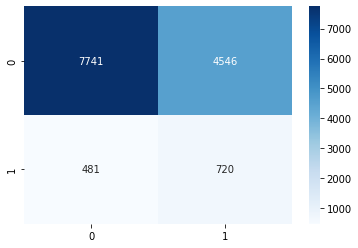

In [ ]:
sns.heatmap(cf_matrix, annot=True, fmt=".0f", cmap = 'Blues')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.60      0.74     12287
           1       0.13      0.60      0.21      1201

    accuracy                           0.60     13488
   macro avg       0.53      0.60      0.47     13488
weighted avg       0.87      0.60      0.69     13488



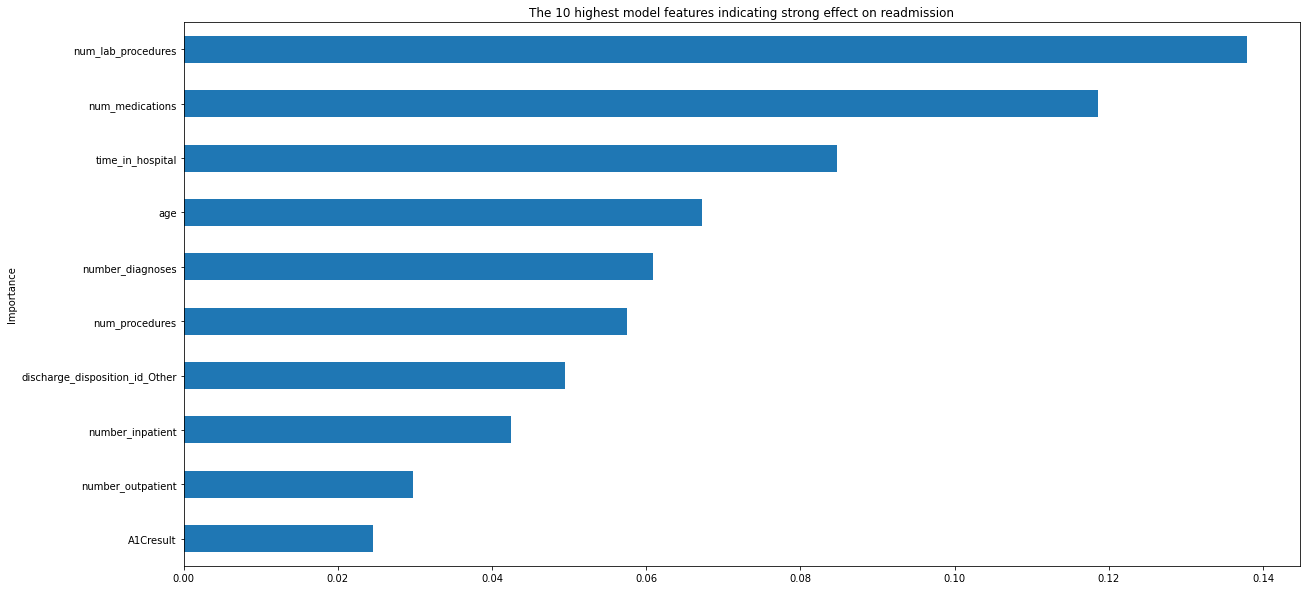

In [18]:
_# Plot out the most important features
features = pd.DataFrame({"importance": random_forest.feature_importances_},index=X_train_down.columns).sort_values("importance", ascending=True)
features.tail(10).plot(kind="barh",align="center", figsize=(20, 10), legend=False)
plt.title("The 10 highest model features indicating strong effect on readmission")
plt.ylabel("Importance")
plt.xticks()
plt.show()


Naïve Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB 
nbmodel = GaussianNB ()
nbmodel.fit(X_train,y_train)
y_pred_nb = nbmodel.predict(X_test)
y_test_proba_nb = nbmodel.predict_proba(X_test)[:,1]
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba_nb)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_nb)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_nb)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_nb)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_nb,average='macro')))

Roc-Auc : 0.63
Accuracy : 0.10
Recall score : 1.00
Precision score: 0.09
F1 score : 0.09


In [ ]:
confusion_matrix(y_test, y_pred_nb)

array([[   59, 12228],
       [    1,  1200]])

It basically classifies all the observations to readmitted

XGBoost

In [ ]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
param_grid = dict(max_depth=list(range(1,36,3)),n_estimators=[100,200,400])
grid = GridSearchCV(XGB_model, param_grid, cv=5, scoring = 'recall')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5907217230838459
{'max_depth': 10, 'n_estimators': 400}
XGBClassifier(max_depth=10, n_estimators=400)


In [34]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_estimators=400)
XGB_model.fit(X_train, y_train)
y_pred_xg = XGB_model.predict(X_test)
y_proba_xg = XGB_model.predict_proba(X_test)[:,1]

print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_proba_xg)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_xg)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_xg)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_xg)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_xg,average='macro')))


Roc-Auc : 0.64
Accuracy : 0.63
Recall score : 0.57
Precision score: 0.13
F1 score : 0.48


SVM

In [36]:
#Refit the model with optimal hyperparameter
from sklearn.svm import SVC

SVM_model_linear = SVC(kernel='linear',probability=True,C=0.01)
SVM_model_linear.fit(X_train, y_train)
y_pred_svm = SVM_model_linear.predict(X_test)
y_test_proba_svm = SVM_model_linear.predict_proba(X_test)[:,1]
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba_svm)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_svm)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_svm)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_svm,average='macro')))

Roc-Auc : 0.63
Accuracy : 0.75
Recall score : 0.40
Precision score: 0.16
F1 score : 0.54


In [37]:
SVM_model_rbf = SVC(kernel='rbf',probability=True,C=0.01)
SVM_model_rbf.fit(X_train, y_train)
y_pred_svm_rbf = SVM_model_rbf.predict(X_test)
y_test_proba_svm_rbf = SVM_model_rbf.predict_proba(X_test)[:,1]
print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_proba_svm_rbf)))
print("Accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred_svm_rbf)))
print("Recall score : {0:.2f}".format(recall_score(y_test, y_pred_svm_rbf)))
print("Precision score: {0:.2f}".format(precision_score(y_test, y_pred_svm_rbf)))
print("F1 score : {0:.2f}".format(f1_score(y_test, y_pred_svm_rbf,average='macro')))

Roc-Auc : 0.62
Accuracy : 0.66
Recall score : 0.52
Precision score: 0.13
F1 score : 0.50


SVC performs better on non-linear model

Use AUC score under ROC Curve to evaluate the models

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

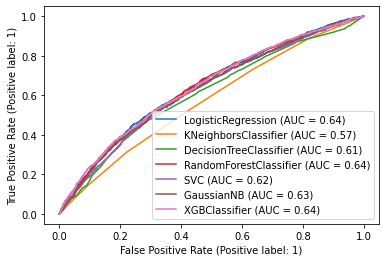

In [38]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(logistic_regression_model, X_test, y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)
plot_roc_curve(dtree, X_test, y_test, ax=disp.ax_)
plot_roc_curve(random_forest, X_test, y_test, ax=disp.ax_)
plot_roc_curve(SVM_model_rbf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(nbmodel, X_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB_model, X_test, y_test, ax=disp.ax_)


Overall Random Forest has better performance

Neural Network Model

Simple MLP

In [19]:
from tensorflow import random as tf_random
from tensorflow import keras
from keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))


model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.0001),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(),keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()]
)

history = model.fit(X_train, y_train, epochs=17,validation_data=(X_test, y_test),verbose=0)





/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


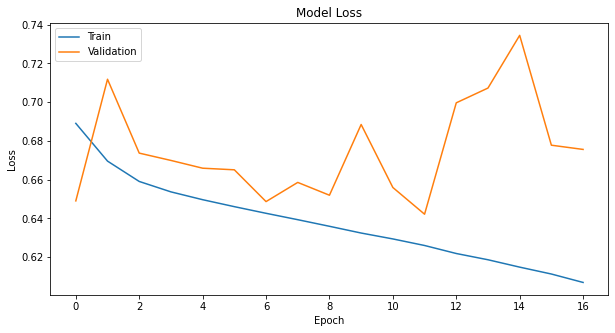

In [20]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

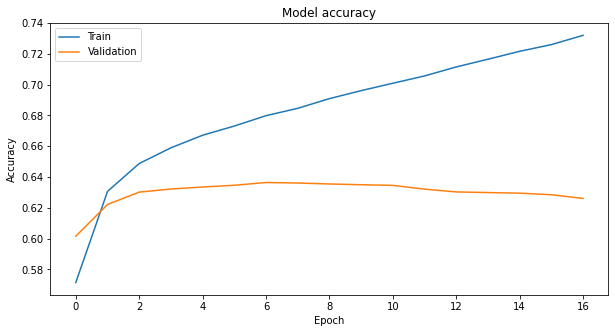

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


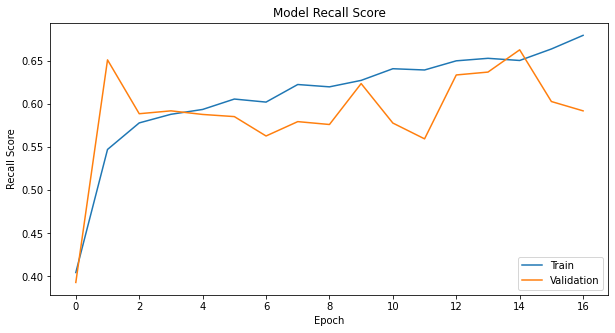

In [22]:
plt.figure(figsize=(10,5))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall Score')
plt.ylabel('Recall Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [23]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall', 'val_auc'])

In [24]:
train_accuracy = history.history["binary_accuracy"][-1]
accuracy = history.history["val_binary_accuracy"][-1]

train_precision = history.history['precision'][-1]
precision = history.history["val_precision"][-1]

train_recall = history.history['recall'][-1]
recall = history.history["val_recall"][-1]

train_AUC = history.history['auc'][-1]
AUC = history.history["val_auc"][-1]

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Train precision: {train_precision:.2f}")
print(f"Train recall: {train_recall:.2f}")
print(f"Train AUC: {train_AUC:.2f}")
print('*'*50)
print(f"Test Accuracy: {accuracy:.2f}") 
print(f"Test precision: {precision:.2f}") 
print(f"Test recall: {recall:.2f}") 
print(f"Test AUC: {AUC:.2f}") 



Train Accuracy: 0.67
Train precision: 0.67
Train recall: 0.68
Train AUC: 0.73
**************************************************
Test Accuracy: 0.61
Test precision: 0.13
Test recall: 0.59
Test AUC: 0.63


In [39]:
log_recall = recall_score(y_test, y_pred_log)
svm_recall = recall_score(y_test, y_pred_svm_rbf)
dt_recall = recall_score(y_test, y_pred_dtree)
rf_recall = recall_score(y_test, y_pred_rf)
nb_recall = recall_score(y_test, y_pred_nb)
xg_recall = recall_score(y_test, y_pred_xg)
knn_recall = recall_score(y_test, y_pred_knn)
MLP_recall = history.history["val_recall"][-1]

log_precision = precision_score(y_test, y_pred_log)
svm_precision = precision_score(y_test, y_pred_svm_rbf)
dt_precision = precision_score(y_test, y_pred_dtree)
rf_precision = precision_score(y_test, y_pred_rf)
nb_precision = precision_score(y_test, y_pred_nb)
xg_precision = precision_score(y_test, y_pred_xg)
knn_precision = precision_score(y_test, y_pred_knn)
MLP_precision = history.history["val_precision"][-1]

log_auc = roc_auc_score(y_test, y_test_proba)
svm_auc = roc_auc_score(y_test, y_test_proba_svm_rbf)
dt_auc = roc_auc_score(y_test, y_test_proba_dtree)
rf_auc = roc_auc_score(y_test, y_test_proba_rf)
nb_auc = roc_auc_score(y_test, y_test_proba_nb)
xg_auc = roc_auc_score(y_test, y_test_proba_svm_rbf)
knn_auc = roc_auc_score(y_test, y_pred_knn)
MLP_auc = history.history["val_auc"][-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


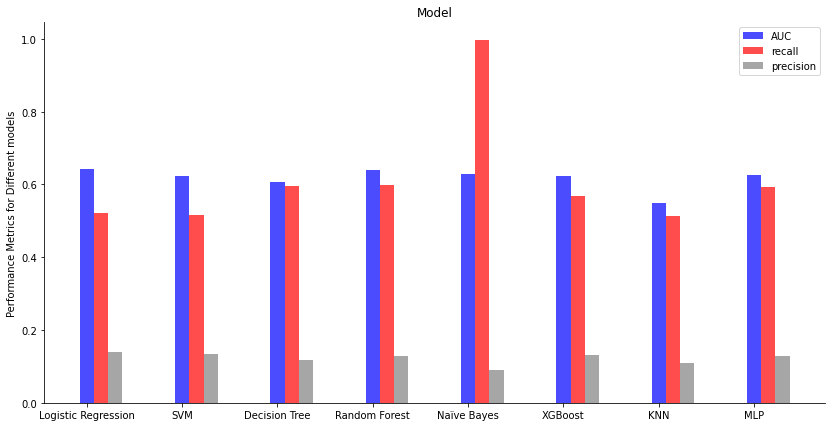

In [40]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)
ax = plt.subplot(111)

models = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest','Naïve Bayes','XGBoost','KNN','MLP']
values = [log_auc, svm_auc, dt_auc,rf_auc,nb_auc,xg_auc,knn_auc,MLP_auc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'AUC')
plt.xticks(model, models)


models = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest','Naïve Bayes','XGBoost','KNN','MLP']
values = [log_recall, svm_recall, dt_recall,rf_recall,nb_recall,xg_recall,knn_recall,MLP_recall]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'recall')
plt.xticks(model, models)
           
ax = plt.subplot(111)

models = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest','Naïve Bayes','XGBoost','KNN','MLP']
values = [log_precision, svm_precision, dt_precision,rf_precision,nb_precision,xg_precision,knn_precision,MLP_precision]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'grey', label = 'precision')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           

The best performed model is random forest. It was able to capture 60% of true readmitted observations. The precision scores across all models are low due to the following reasons:
1. The dataset is not informative as a lot of results and medications values shown as "No" or "None" 
2. A lot of patients (40% of "not readmitted class) were readmitted to hospital after 30 days, they were classified as "readmitted" in our model
